<a href="https://colab.research.google.com/github/NikTamu3/myproject/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [ ]:
data = data=tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/segmented',batch_size=32)

Found 59 files belonging to 2 classes.


In [ ]:
data_iterator=data.as_numpy_iterator()
#images representated as numpy arrays
label=data_iterator.next()

In [ ]:
class_names=data.class_names
print(class_names)

['bulbar', 'penile']


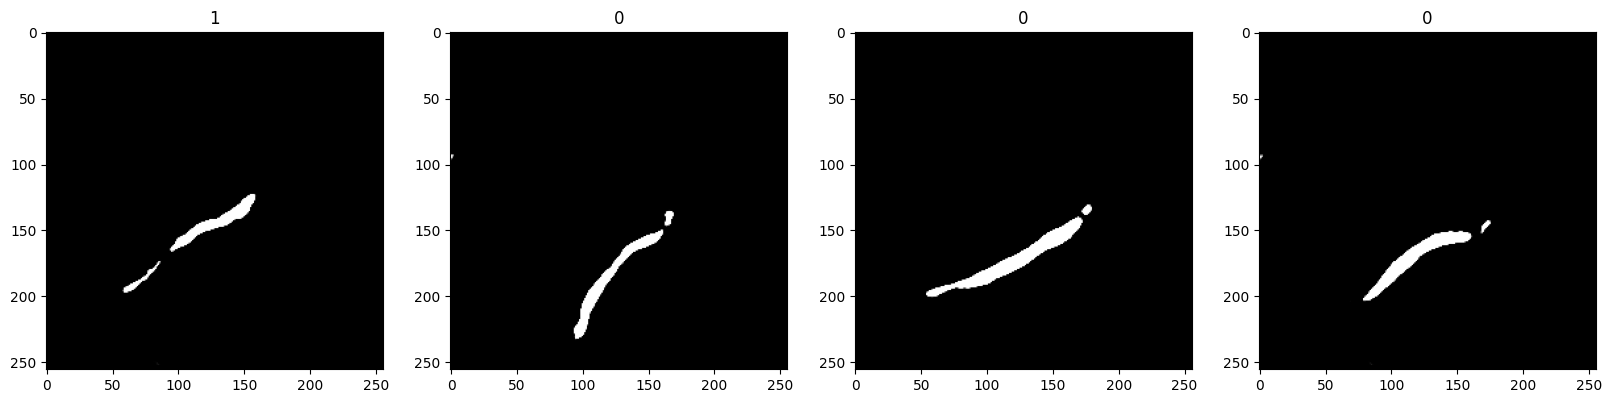

In [ ]:
#plotting few images

fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(label[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(label[1][idx])


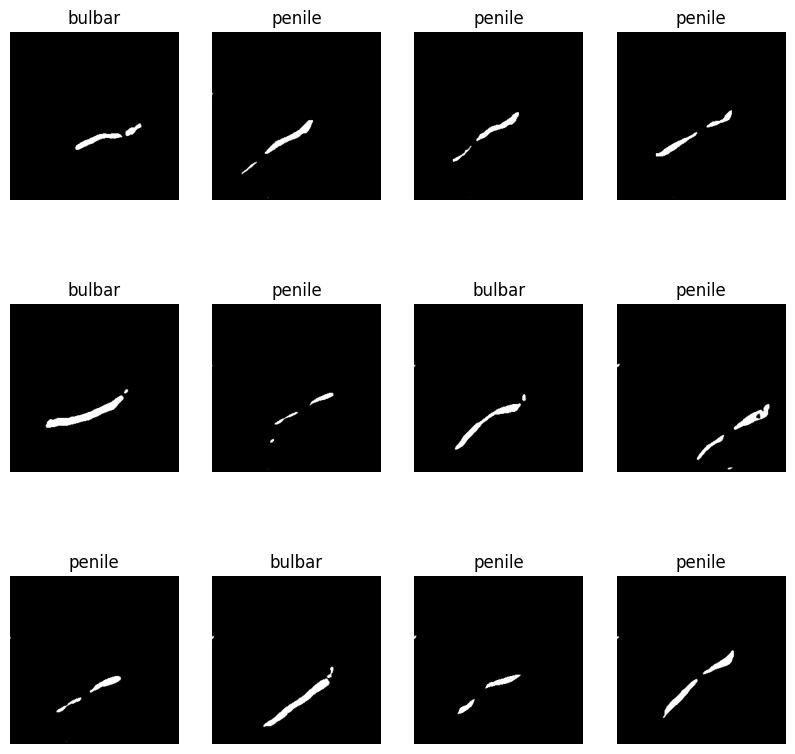

In [ ]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in data.take(1):
  for i in range(12):
    ax=plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype(int))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")


In [ ]:
# Path to the dataset directory
dataset_path = '/content/drive/MyDrive/segmented'

# Define the batch size
batch_size = 32

# Create the training dataset
train_data = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    labels='inferred',
    label_mode='binary',
    validation_split=0.3,
    subset='training',
    seed=123,
    image_size=(256, 256),
    batch_size=batch_size
)

# Create the validation dataset
validation_data = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    labels='inferred',
    label_mode='binary',
    validation_split=0.2,  # Use 20% of the original dataset for validation
    subset='validation',
    seed=123,
    image_size=(256, 256),
    batch_size=batch_size
)

# Create the test dataset
test_data = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    labels='inferred',
    label_mode='binary',
    validation_split=0.1,  # Use 10% of the original dataset for testing
    subset='validation',
    seed=123,
    image_size=(256, 256),
    batch_size=batch_size
)

# Print class names
class_names = train_data.class_names
print(class_names)


Found 59 files belonging to 2 classes.
Using 42 files for training.
Found 59 files belonging to 2 classes.
Using 11 files for validation.
Found 59 files belonging to 2 classes.
Using 5 files for validation.
['bulbar', 'penile']


In [ ]:
# Define the class names
class_names = ['bulbar', 'penile']

# Initialize counters for each set
train_counts = {class_name: 0 for class_name in class_names}
val_counts = {class_name: 0 for class_name in class_names}
test_counts = {class_name: 0 for class_name in class_names}

# Count the number of instances in the training set
for images, labels in train_data:
    for label in labels:
        class_name = class_names[int(label)]
        train_counts[class_name] += 1

# Count the number of instances in the validation set
for images, labels in validation_data:
    for label in labels:
        class_name = class_names[int(label)]
        val_counts[class_name] += 1

# Count the number of instances in the testing set
for images, labels in test_data:
    for label in labels:
        class_name = class_names[int(label)]
        test_counts[class_name] += 1

# Print the counts for each set
print("Training set:")
print(train_counts)
print("Validation set:")
print(val_counts)
print("Testing set:")
print(test_counts)


Training set:
{'bulbar': 20, 'penile': 22}
Validation set:
{'bulbar': 4, 'penile': 7}
Testing set:
{'bulbar': 1, 'penile': 4}


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator instance for data augmentation
datagen = ImageDataGenerator(
    rescale=1/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Apply data augmentation to the training dataset
augmented_train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    subset='training',
    seed=123
)

val_datagen=ImageDataGenerator(rescale=1/255.0)

val_data=val_datagen.flow_from_directory(dataset_path,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    subset='training',
    seed=123)

Found 59 images belonging to 2 classes.
Found 59 images belonging to 2 classes.


In [ ]:
train_data=np.array(train_data)
train_data.max()

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

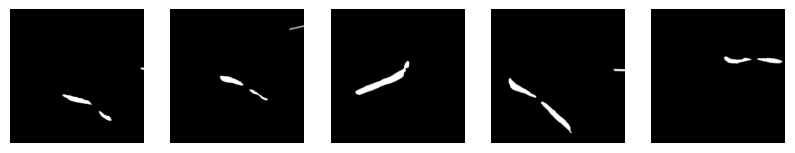

In [ ]:
import matplotlib.pyplot as plt

# Generate augmented images
augmented_images, _ = next(augmented_train_data)

# Plot the first 5 augmented images
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(augmented_images[i].squeeze(), cmap='gray')
    plt.axis('off')
plt.show()


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=12,
    restore_best_weights=True,
    verbose=1
)


In [ ]:
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_path = "_FinalClass_model.h5"
checkpoint_callback = ModelCheckpoint(checkpoint_path,
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      mode='max',
                                      verbose=1)


In [ ]:
from tensorflow.keras.callbacks import TensorBoard
tensorboard_callback =  TensorBoard(log_dir='BP_logs', histogram_freq=0, write_graph=True, write_images=False)


In [ ]:
from tensorflow.keras.metrics import Precision, Recall

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras import optimizers
from tensorflow.keras import layers

from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense

inputs = Input((256, 256, 3))

c1 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
c1 = MaxPooling2D((2,2))(c1)

c2 = Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_normal', padding='same')(c1)
c2 = MaxPooling2D((2,2))(c2)

c3 = Conv2D(128, (3, 3), activation='relu',kernel_initializer='he_normal', padding='same')(c2)
c3 = MaxPooling2D((2,2))(c3)

c4 = Conv2D(256, (3, 3), activation='relu',kernel_initializer='he_normal', padding='same')(c3)
c4 = MaxPooling2D((2,2))(c4)


c4 = Dropout(0.2)(c4)

flatten = Flatten()(c4)


x = Dense(256, activation='relu')(flatten)
outputs = Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=[inputs], outputs=[outputs])




In [ ]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_20 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 128, 128, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 64, 64, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 64, 64, 128)       7385

In [ ]:
model.compile(tf.keras.optimizers.Adam(learning_rate=0.001),loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy',Precision(),Recall()])

In [ ]:
history=model.fit(augmented_train_data,validation_data=val_data,epochs=60,callbacks=[early_stopping_callback,checkpoint_callback,tensorboard_callback])

Epoch 1/60
2/2 [==============================] - ETA: 0s - loss: 3.0597 - accuracy: 0.4068 - precision_6: 0.4762 - recall_6: 0.2941
Epoch 1: val_accuracy improved from -inf to 0.62712, saving model to _FinalClass_model.h5
2/2 [==============================] - 5s 2s/step - loss: 3.0597 - accuracy: 0.4068 - precision_6: 0.4762 - recall_6: 0.2941 - val_loss: 1.3616 - val_accuracy: 0.6271 - val_precision_6: 0.6500 - val_recall_6: 0.7647
Epoch 2/60
2/2 [==============================] - ETA: 0s - loss: 1.9952 - accuracy: 0.5593 - precision_6: 0.5714 - recall_6: 0.9412
Epoch 2: val_accuracy did not improve from 0.62712
2/2 [==============================] - 2s 940ms/step - loss: 1.9952 - accuracy: 0.5593 - precision_6: 0.5714 - recall_6: 0.9412 - val_loss: 0.8751 - val_accuracy: 0.5763 - val_precision_6: 0.5763 - val_recall_6: 1.0000
Epoch 3/60
2/2 [==============================] - ETA: 0s - loss: 0.7926 - accuracy: 0.5763 - precision_6: 0.5763 - recall_6: 1.0000
Epoch 3: val_accuracy did

In [ ]:
model.evaluate(test_data)

1/1 [==============================] - 3s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000


[0.0, 1.0, 1.0, 1.0]

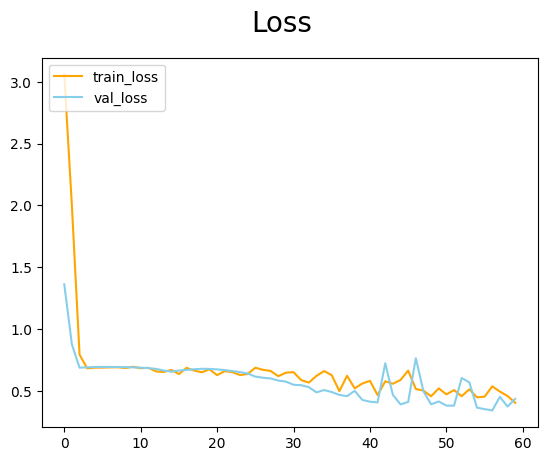

In [ ]:
fig=plt.figure()
plt.plot(history.history['loss'],color='orange',label='train_loss')
plt.plot(history.history['val_loss'],color='skyblue',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

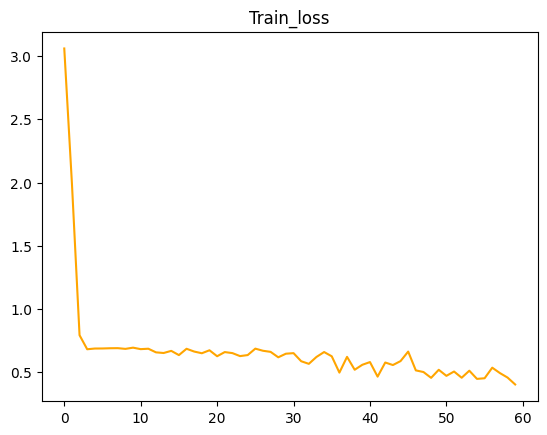

In [ ]:
plt.plot(history.history['loss'],color='orange')
plt.title('Train_loss')
plt.show()

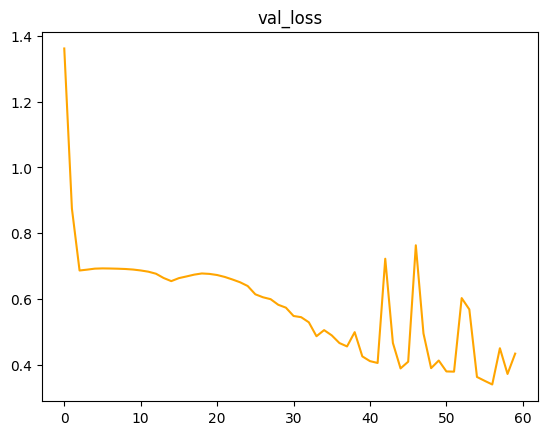

In [ ]:
plt.plot(history.history['val_loss'],color='orange')
plt.title('val_loss')
plt.show()

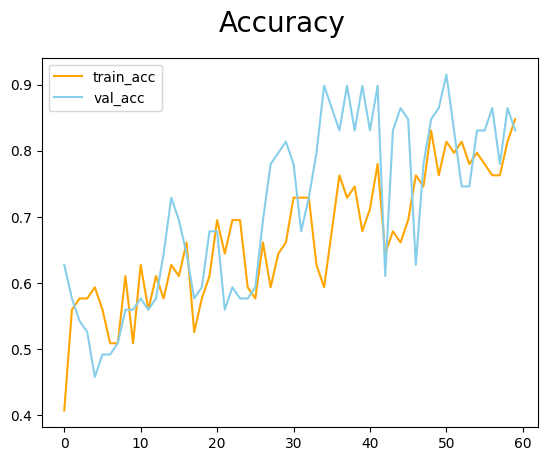

In [ ]:
fig=plt.figure()
plt.plot(history.history['accuracy'],color='orange',label='train_acc')
plt.plot(history.history['val_accuracy'],color='skyblue',label='val_acc')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc='upper left')
plt.show()

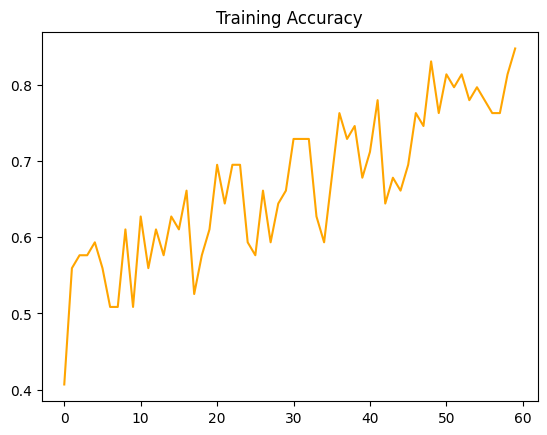

In [ ]:
plt.plot(history.history['accuracy'],color='orange')
plt.title('Training Accuracy')
plt.show()

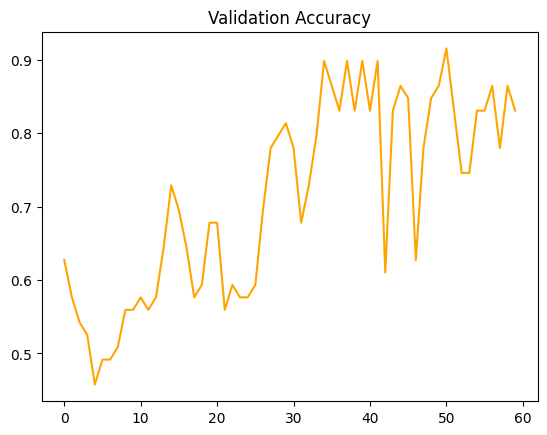

In [ ]:
plt.plot(history.history['val_accuracy'],color='orange')
plt.title('Validation Accuracy')
plt.show()

Image to predict:


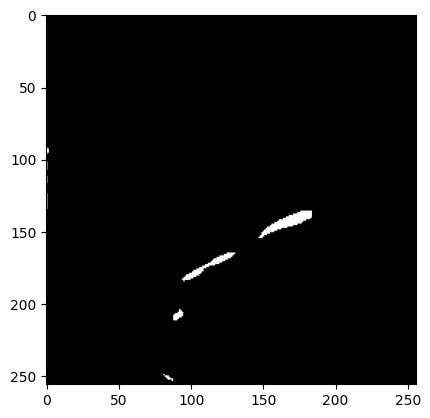

Actual label: penile
1/1 [==============================] - 0s 78ms/step
Predicted label: Penile
Predicted value: 1.0
Image to predict:


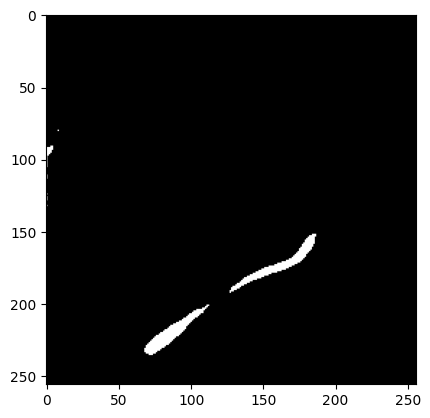

Actual label: penile
1/1 [==============================] - 0s 19ms/step


Predicted label: Penile
Predicted value: 1.0
Image to predict:


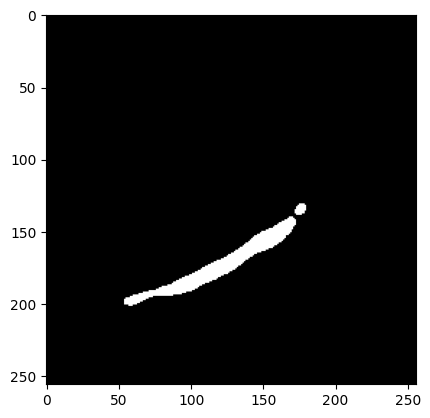

Actual label: bulbar
1/1 [==============================] - 0s 18ms/step


Predicted label: Bulbar
Predicted value: 0.001994894
Image to predict:


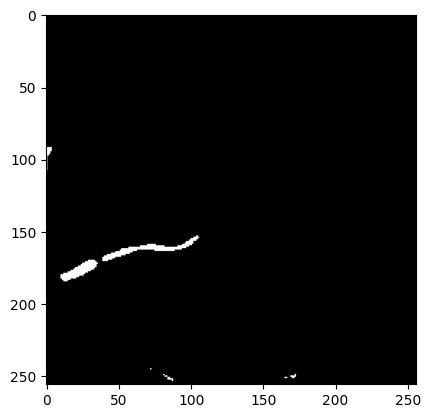

Actual label: penile
1/1 [==============================] - 0s 21ms/step


Predicted label: Penile
Predicted value: 1.0
Image to predict:


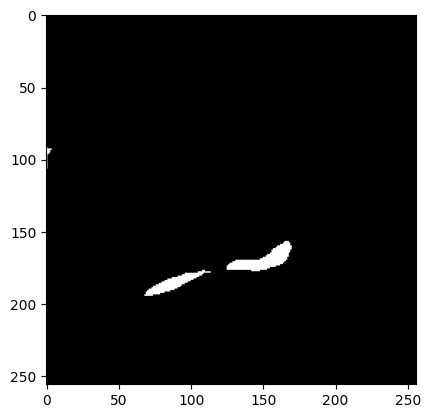

Actual label: penile
1/1 [==============================] - 0s 18ms/step
Predicted label: Penile
Predicted value: 1.0


In [ ]:
count = 0
for images_batch, labels_batch in test_data:
    for i in range(len(images_batch)):
        if count >= 5:
            break
        image = images_batch[i]
        label = labels_batch[i]

        print("Image to predict:")
        plt.imshow(image)
        plt.show()
        print("Actual label:", class_names[int(label)])

        # Reshape the image to match the model input shape
        image = np.expand_dims(image, axis=0)

        # Predict the label for the image
        prediction = model.predict(image)[0][0]
        predicted_label = "Bulbar" if prediction < 0.5 else "Penile"
        print("Predicted label:", predicted_label)
        print("Predicted value:", prediction)

        count += 1
    if count >= 5:
        break


1/1 [==============================] - 0s 20ms/step


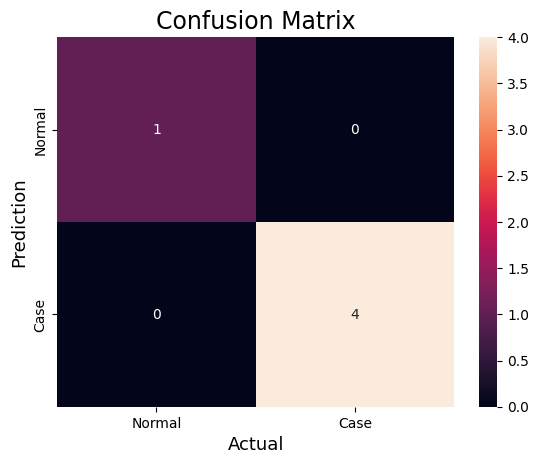

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

th = 0.5


all_y = []
all_yhat = []


for images_batch, labels_batch in test_data:
    # Predictions using the model and threshold
    batch_predictions = (model.predict(images_batch) >= th).astype(int)


    all_y.extend(labels_batch)
    all_yhat.extend(batch_predictions)



all_y = np.array(all_y)
all_yhat = np.array(all_yhat)

# Calculating the confusion matrix
cm = confusion_matrix(all_y, all_yhat)


sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Normal', 'Case'],
            yticklabels=['Normal', 'Case'],
            )
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()


In [ ]:
import tensorflow as tf
from sklearn.model_selection import KFold
import numpy as np


data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/segmented', batch_size=32)
data1=data.map(lambda x,y:(x/255,y))

# Extracting features (X) and labels (y) from the dataset
X = []
y = []
for images, labels in data:
    X.append(images.numpy())
    y.append(labels.numpy())
X = np.concatenate(X)
y = np.concatenate(y)

Found 59 files belonging to 2 classes.


In [ ]:
cv_results = []
cnt = 1
from sklearn.model_selection import KFold
# Initializing desired number of folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)


for train_index, val_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(val_index)}')
    cnt += 1


    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]



    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


    val_loss, val_accuracy = model.evaluate(X_val, y_val)
    print(f'Validation accuracy: {val_accuracy}')

    cv_results.append(val_accuracy)


cv_results = np.array(cv_results)

# cross-validation results
print("Cross-validation results:", cv_results)
print("Mean accuracy:", cv_results.mean())


Fold:1, Train set: 53, Test set:6
1/1 [==============================] - 0s 241ms/step - loss: 52.3532 - accuracy: 0.6667
Validation accuracy: 0.6666666865348816
Fold:2, Train set: 53, Test set:6
1/1 [==============================] - 0s 337ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Validation accuracy: 1.0
Fold:3, Train set: 53, Test set:6
1/1 [==============================] - 0s 345ms/step - loss: 35.8373 - accuracy: 0.8333
Validation accuracy: 0.8333333134651184
Fold:4, Train set: 53, Test set:6
1/1 [==============================] - 0s 337ms/step - loss: 56.8711 - accuracy: 0.8333
Validation accuracy: 0.8333333134651184
Fold:5, Train set: 53, Test set:6
1/1 [==============================] - 0s 329ms/step - loss: 98.1708 - accuracy: 0.8333
Validation accuracy: 0.8333333134651184
Fold:6, Train set: 53, Test set:6
1/1 [==============================] - 0s 331ms/step - loss: 173.5004 - accuracy: 0.6667
Validation accuracy: 0.6666666865348816
Fold:7, Train set: 53, Test set:6
1/1 [

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model


mask_path = '/content/drive/MyDrive/segmented/penile/penile_1.3.12.2.1107.5.3.4.1638.3.201203131451250126_1cdata202.bmp'


mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
mask = cv2.resize(mask, (256, 256))
mask=mask/255.0

# Reshaping the mask to add a channel dimension
processed_mask = np.expand_dims(mask, axis=-1)
processed_mask = np.expand_dims(processed_mask, axis=0)
processed_mask_rgb = np.repeat(processed_mask, 3, axis=-1)

# Using the classification model to predict the class of the mask
prediction = model.predict(processed_mask_rgb)


print(prediction)
if prediction  <= 0.5:
    print("Predicted class: Bulbar")
else:
    print("Predicted class: Penile")


1/1 [==============================] - 0s 73ms/step
[[0.8099839]]
Predicted class: Penile
